In [1]:
import numpy as np
import random

from matplotlib import pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 9, 10, 5, 6, 9, 4, 7, 64]
y = [3, 5, 2, 7, 4, 3, 8, 6, 9, 6, 8, 3, 6, 9, 77]

x = np.array(x)
y = np.array(y)

### Scatter plot

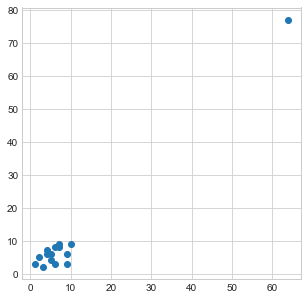

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.show()

### Scatter plot with mean (including outlier)

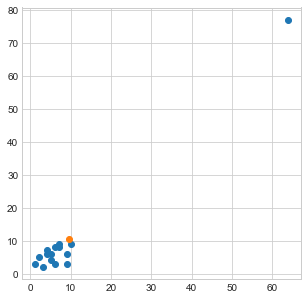

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.scatter(x_mean, y_mean)
plt.show()

### Scatter plot with mean (exluding outlier)

In [5]:
def calculate_zscores(data_values):
    data_array = np.array(data_values)
    mean_val = np.mean(data_array)
    std_dev = np.std(data_array)
    z_scores = (data_array - mean_val) / std_dev
    return z_scores

In [6]:
def get_outlier_vals(data_values):
    z_scores = calculate_zscores(data_values=data_values)
    inds = list(np.where(z_scores < -3)[0])
    inds.extend(list(np.where(z_scores > 3)[0]))
    outlier_vals = [data_values[i] for i in sorted(inds)]
    return outlier_vals

In [7]:
out_x = get_outlier_vals(data_values=x)
out_y = get_outlier_vals(data_values=y)

mx = np.delete(x, np.where(x == np.array(out_x)))
my = np.delete(y, np.where(y == np.array(out_y)))

x_mean = round(np.mean(mx))
y_mean = round(np.mean(my))

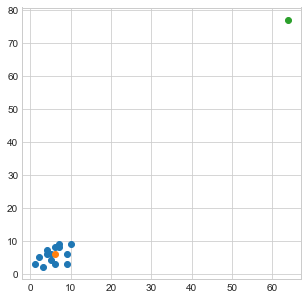

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(mx, my)
plt.scatter(x_mean, y_mean)
plt.scatter(out_x, out_y)
plt.show()

### Plotting the outlier boundary

In [9]:
def find_max_distances(value, arr):
    arr = np.array(arr)
    distances = [abs(value - arr[i]) for i in arr]
    return round(max(distances))

In [10]:
def circle_plotter(radius):
    theta = np.linspace(0, 2 * np.pi, 150)
    radius = radius ** 2
    a = radius * np.cos(theta)
    b = radius * np.sin(theta)
    return a, b

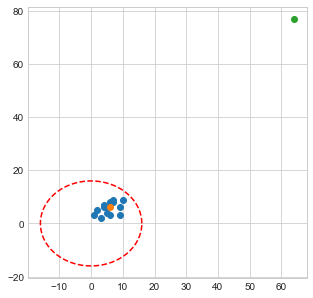

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(mx, my)
plt.scatter(x_mean, y_mean)
plt.scatter(out_x, out_y)

radius = find_max_distances(x_mean, mx)
a, b = circle_plotter(radius=radius)
plt.plot(a, b, '--r')

plt.show()

### End